In [19]:
#현재 파이썬 버전 3.8.8
#JPype1 0.5.7버전 이상
!pip install JPype1-1.3.0-cp38-cp38-win_amd64.whl
!pip install konlpy

Processing d:\빅데이터\프로젝트 데이터 크롤링\jpype1-0.7.1-cp38-cp38-win_amd64.whl


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'D:\\빅데이터\\프로젝트 데이터 크롤링\\JPype1-0.7.1-cp38-cp38-win_amd64.whl'



In [ ]:
import pandas as pd
import konlpy
from konlpy.tag import Okt
from collections import Counter

In [27]:
from konlpy.tag import Okt
from collections import Counter

#파일 불러오기
f = open('대전시소_크롤링_결과.csv','r',encoding='cp949')
reply = f.read()

#okt 객체 생성
okt = Okt()
noun = okt.nouns(reply)
for i in noun[:]:
    if len(i) < 2:
        noun.remove(i)
count = Counter(noun)

#명사 빈도 카운트
noun_list = count.most_common(100)
for v in noun_list:
    print(v)

#txt 파일로 저장
with open("noun_list.txt",'w',enconding='cp949') as f:
    for v in noun_list:
        f.write("".join(map(str,v)))
        f.wirte('\n')
    
#csv 파일로 저장
with open("noun_list.csv","w",newline='',enconding='cp949') as f:
    csvw = csv.writer(f)
    for v in noun_list:
        csvw.writerow(v)

('대전', 134)
('일자리', 53)
('도시', 43)
('생각', 41)
('지역', 39)
('인구', 37)
('청년', 35)
('사람', 34)
('기업', 21)
('정책', 20)
('세종', 19)
('지원', 18)
('전시', 17)
('제공', 16)
('출산', 16)
('취업', 15)
('대기업', 14)
('주택', 13)
('관광', 12)
('개발', 12)
('주변', 11)
('유입', 10)
('공간', 10)
('사업', 10)
('유출', 10)
('위해', 10)
('살기', 10)
('교통', 10)
('활성화', 10)
('아이', 9)
('홍보', 9)
('관련', 9)
('결혼', 9)
('필요', 9)
('전국', 9)
('경우', 9)
('대한', 9)
('사회', 9)
('세종시', 9)
('유치', 9)
('지하철', 8)
('이상', 8)
('노잼', 8)
('중소기업', 8)
('혜택', 8)
('대학', 8)
('교육', 8)
('문화', 8)
('지금', 8)
('주민', 8)
('가구', 8)
('비용', 8)
('과학', 7)
('프로그램', 7)
('시간', 7)
('시민', 7)
('부족', 7)
('다른', 7)
('공원', 7)
('서울', 7)
('이전', 7)
('양질', 7)
('적극', 7)
('노인', 7)
('거리', 6)
('활용', 6)
('한번', 6)
('하나', 6)
('운영', 6)
('대학생', 6)
('채용', 6)
('공장', 6)
('외부', 6)
('정말', 6)
('이동', 6)
('센터', 6)
('해결', 6)
('방법', 6)
('부분', 6)
('우선', 5)
('현재', 5)
('발전', 5)
('진행', 5)
('참여', 5)
('지속', 5)
('때문', 5)
('자연', 5)
('단지', 5)
('시설', 5)
('공공기관', 5)
('확대', 5)
('제도', 5)
('개선', 5)
('이유', 5)
('상황', 5)
('집값', 5

TypeError: 'enconding' is an invalid keyword argument for open()

In [41]:
df = pd.DataFrame(noun_list)
df.columns =['키워드','빈도수']

df.to_csv("대전시소_댓글_키워드_빈도수.csv",encoding='cp949')

In [62]:
#워드클라우드로 시각화
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#기본 세팅
wc = WordCloud(width=1200, 
               height=700,
               max_font_size = 300,
               background_color="white",
               random_state=0, 
               font_path=r'c:\Windows\Fonts\malgun.ttf')

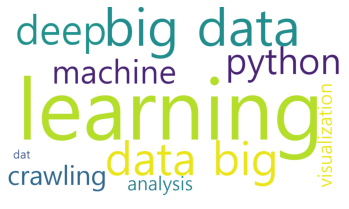

In [63]:
#워드클라우드 테스트
text = '''python python python python python
big data big dat big data big data big data big data big data big data big data big data
crawling crawling crawling crawling
analysis analysis analysis analysis
visualization visualization visualization visualization
machine learning machine learning machine learning machine learning machine learning
deep learning deep learning deep learning deep learning deep learning deep learning
'''

plt.imshow(wc.generate(text))
plt.axis("off")
plt.show()

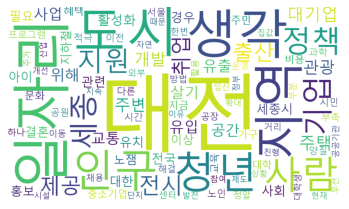

In [64]:
#워드 클라우드 시각화
plt.imshow(wc.generate_from_frequencies(dict(noun_list)))
plt.axis("off")
plt.show()

In [66]:
#워드 클라우드 저장
wc.to_file('wordcloud_reply1.png')